In [0]:
# Use GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
# Make google drive directory
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive


In [0]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/COMP5703')
os.getcwd()

'/content/drive/My Drive/COMP5703'

In [0]:
#import library
import pandas as pd
import numpy as np
from glob import glob
import fnmatch
import cv2
from glob import glob
import pandas as pd
import numpy as np
import fnmatch
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
x_sub=np.load('X_new.npy')
y_sub=np.load('Y_new.npy')
x_sub=x_sub[0:40000]
y_sub=y_sub[0:40000]

In [0]:
x_sub = np.array(x_sub)
x_sub_shape = x_sub.shape[1] * x_sub.shape[2] * x_sub.shape[3]
x_flat = x_sub.reshape(x_sub.shape[0], x_sub_shape)
r = pd.value_counts(y_sub)
print(r)
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(ratio='auto')
x_flat_resample,y_sub_resample=rus.fit_sample(x_flat,y_sub)
len(x_flat_resample)
r = pd.value_counts(y_sub_resample)
print(r)
print('length of X_flat_resample',len(x_flat_resample))
print('length of Y_flat_resample',len(y_sub_resample))

0    30556
1     9444
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    9444
0    9444
dtype: int64
length of X_flat_resample 18888
length of Y_flat_resample 18888


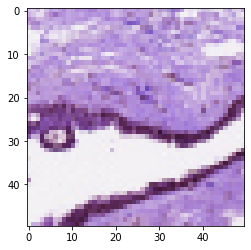

In [0]:
plt.imshow(x_sub[0]) # followed by 
plt.show()

In [0]:
#standardise data and do PCA 
standardised_X = StandardScaler().fit_transform(x_flat_resample)
pca = PCA(n_components=6,whiten=True) 
pca.fit(standardised_X) 
transformed_X=pca.transform(standardised_X) 
print(len(transformed_X))
print(transformed_X[0])

18888
[-1.42666627  0.33356667  0.13897141  0.20927402  0.18557054 -0.15075773]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y_sub_resample, test_size=0.2, random_state = 2) # 0.2 test_size means 20%
print(len(X_train), len(y_train), len(X_test),len(y_test))


15110 15110 3778 3778


In [0]:
#SVM
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.metrics import roc_curve, auc

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
import itertools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


def plot_cm(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_lc(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')


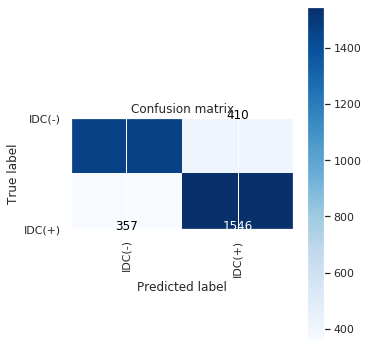

In [0]:
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_cm(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()


In [0]:
accuracy_score(y_test, y_pred, normalize=True)


0.8038644785600847

In [0]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [0]:
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1511  364]
 [ 377 1526]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1875
           1       0.81      0.80      0.80      1903

    accuracy                           0.80      3778
   macro avg       0.80      0.80      0.80      3778
weighted avg       0.80      0.80      0.80      3778



In [0]:
y_score = clf.fit(X_train, y_train).decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
fpr,tpr,threshold = roc_curve(y_test, y_score)

In [0]:
roc_auc = auc(fpr,tpr)

In [0]:
print(roc_auc)

0.8755643370117359


<Figure size 432x288 with 0 Axes>

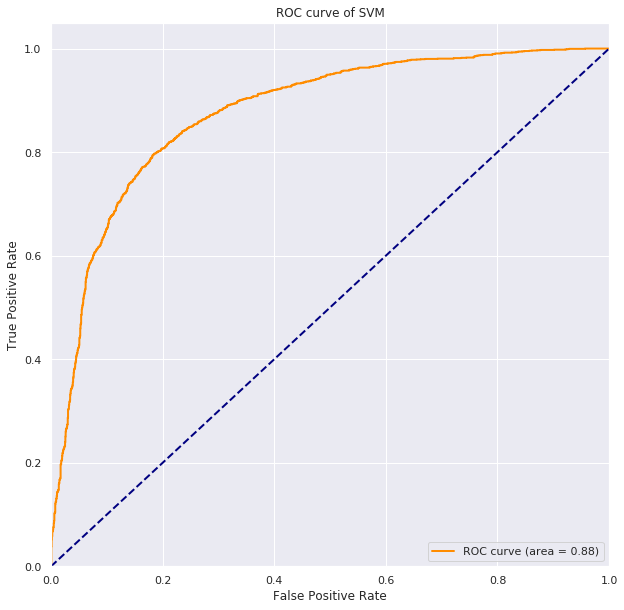

In [0]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of SVM')
plt.legend(loc="lower right")
plt.show()

In [0]:
cm= confusion_matrix(y_test,y_pred)
sensitivity= cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )
secificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ',secificity)

Sensitivity :  0.8018917498686284
Specificity :  0.8058666666666666
